In [5]:
# First let's update all the packages to the latest ones with the following command
!sudo apt update -qq

# Now we want to install some prerequisite packages which will let us use HTTPS over apt
!sudo apt install apt-transport-https ca-certificates curl software-properties-common -qq

# After that we will add the GPG key for the official Docker repository to the system
!curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo apt-key add -

# We will add the Docker repository to our APT sources
!sudo add-apt-repository "deb [arch=amd64] https://download.docker.com/linux/ubuntu bionic stable"

# Next let's update the package database with our newly added Docker package repo
!sudo apt update -qq

# Finally lets install docker with the below command
!sudo apt install docker-ce

# Lets check that docker is running
!docker

# Originally, we did the following: (but doesn't work in Colab...)
# sudo systemctl status docker

# The output should be similar to this snippet below
# ● docker.service - Docker Application Container Engine
#    Loaded: loaded (/lib/systemd/system/docker.service; enabled; vendor preset: enabled)
#    Active: active (running) since Tue 2019-01-01 19:22:114 UTC; 1min 25s ago
#      Docs: https://docs.docker.com
#  Main PID: 10096 (dockerd)
#     Tasks: 16
#    CGroup: /system.slice/docker.service
#            ├─10096 /usr/bin/dockerd -H fd://
#            └─10113 docker-containerd --config /var/run/docker/containerd/containerd.toml

# And now that everything is good, you should be able to do:

# docker run -it -p 8888:8888 gcr.io/tensorflow/tensorflow

55 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
ca-certificates is already the newest version (20240203~22.04.1).
curl is already the newest version (7.81.0-1ubuntu1.19).
software-properties-common is already the newest version (0.99.22.9).
The following NEW packages will be installed:
  apt-transport-https
0 upgraded, 1 newly installed, 0 to remove and 55 not upgraded.
Need to get 1,510 B of archives.
After this operation, 170 kB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf:

In [ ]:
!pip install transformers
!pip install datasets
!pip install audiomentations
!pip install TFAutoModelForAudioClassification
!pip install -U transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 6.4 MB/s eta 0:00:00
  

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from datasets import load_dataset
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift
from transformers import AutoFeatureExtractor, AutoModelForAudioClassification,  AutoTokenizer, TFAutoModelForAudioClassification
from sklearn.model_selection import train_test_split



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kynthesis/vctk-corpus")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1


In [ ]:
import os
print(os.listdir(path))
base_audio_path = '/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48'
print(os.listdir(base_audio_path))

['VCTK-Corpus']
['p311', 'p303', 'p297', 'p262', 'p275', 'p280', 'p326', 'p250', 'p310', 'p282', 'p305', 'p294', 'p340', 'p243', 'p227', 'p333', 'p276', 'p347', 'p261', 'p268', 'p264', 'p230', 'p231', 'p339', 'p254', 'p239', 'p234', 'p252', 'p288', 'p360', 'p229', 'p272', 'p376', 'p273', 'p259', 'p246', 'p258', 'p302', 'p335', 'p343', 'p300', 'p247', 'p284', 'p341', 'p323', 'p318', 'p270', 'p245', 'p345', 'p238', 'p363', 'p255', 'p316', 'p287', 'p225', 'p244', 'p281', 'p301', 'p256', 'p251', 'p285', 'p364', 'p278', 'p266', 'p241', 'p226', 'p240', 'p313', 'p334', 'p362', 'p274', 'p253', 'p329', 'p374', 'p293', 'p306', 'p361', 'p249', 'p265', 'p307', 'p315', 'p308', 'p312', 'p298', 'p317', 'p269', 'p299', 'p260', 'p228', 'p292', 'p336', 'p257', 'p277', 'p283', 'p286', 'p295', 'p263', 'p351', 'p233', 'p330', 'p304', 'p237', 'p279', 'p314', 'p248', 'p267', 'p236', 'p232', 'p271']


In [ ]:
# Specify the path containing the subdirectories
base_audio_path = '/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48'

# Traverse all subdirectories and collect .wav files
wav_files = []
for root, dirs, files in os.walk(base_audio_path):
    for file in files:
        if file.endswith(".wav"):
            wav_files.append(os.path.join(root, file))

# Print all the collected .wav file paths
print(f"Found {len(wav_files)} .wav files:")
for wav_file in wav_files[:10]:  # Display only the first 10 for brevity
    print(wav_file)


Found 44242 .wav files:
/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48/p311/p311_076.wav
/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48/p311/p311_290.wav
/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48/p311/p311_218.wav
/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48/p311/p311_296.wav
/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48/p311/p311_256.wav
/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48/p311/p311_312.wav
/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48/p311/p311_376.wav
/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48/p311/p311_379.wav
/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48/p311/p311_367.wav
/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VC

In [ ]:
import librosa

# Load the first .wav file
audio, sr = librosa.load(wav_files[0], sr=None)
print(f"Loaded audio file: {wav_files[0]}")
print(f"Audio shape: {audio.shape}, Sampling rate: {sr}")


Loaded audio file: /root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48/p311/p311_076.wav
Audio shape: (153714,), Sampling rate: 48000


In [ ]:
import numpy as np

# Initialize storage for preprocessed audio data
processed_audio = []
sampling_rates = []

for wav_file in wav_files:
    try:
        # Load each audio file
        audio, sr = librosa.load(wav_file,sr=44100)  # Downsample to lower sample rate if you dont have the required resources
        processed_audio.append(audio)
        sampling_rates.append(sr)
    except Exception as e:
        print(f"Error loading {wav_file}: {e}")

print(f"Processed {len(processed_audio)} audio files.")


Processed 44242 audio files.


In [ ]:
import torch
import torchaudio
from torchaudio.transforms import MFCC

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize MFCC transformation
mfcc_transform = MFCC(
    sample_rate=44100,
    n_mfcc=13,
    melkwargs={"n_fft": 400, "hop_length": 160, "n_mels": 23, "center": False}
).to(device)

def extract_mfcc(audio_path):
    waveform, sample_rate = torchaudio.load(audio_path)
    waveform = waveform.to(device)
    mfcc = mfcc_transform(waveform)
    return mfcc.cpu().numpy()



In [ ]:
# Use actual paths to your audio files from the 'wav_files' list
audio_path  = wav_files
mfcc_features = []

for audio_path in audio_path:
    mfcc = extract_mfcc(audio_path)
    mfcc_features.append(mfcc)

print(f"Extracted MFCCs for {len(mfcc_features)} audio files.")

Extracted MFCCs for 44242 audio files.


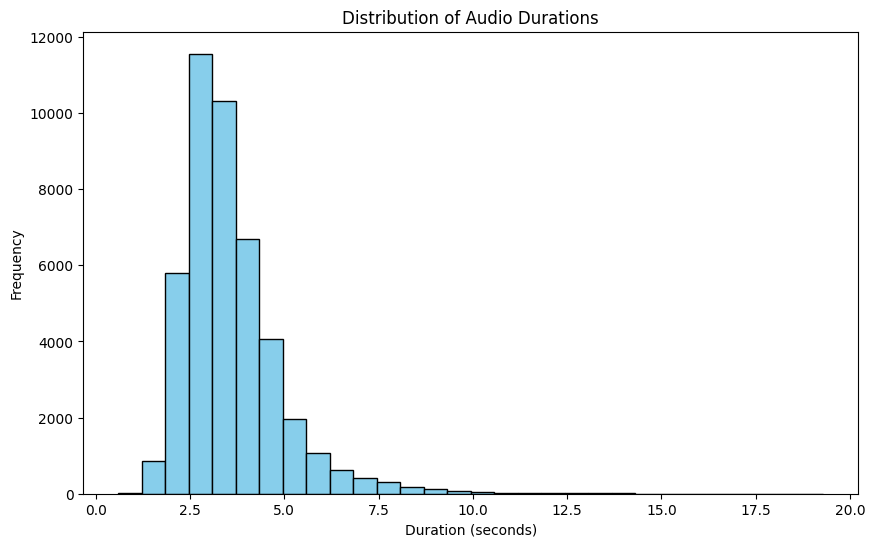

Average duration: 3.58 seconds
Minimum duration: 0.60 seconds
Maximum duration: 19.28 seconds


In [ ]:
#EDA:
import librosa

# Calculate durations
durations = [len(audio) / sr for audio, sr in zip(processed_audio, sampling_rates)]

# Plot distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(durations, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

print(f"Average duration: {sum(durations) / len(durations):.2f} seconds")
print(f"Minimum duration: {min(durations):.2f} seconds")
print(f"Maximum duration: {max(durations):.2f} seconds")


In [ ]:
# Function to display spectrogram
def display_spectrogram(y, sr, title):
    plt.figure(figsize=(10, 4))
    D = librosa.stft(y)  # Short-time Fourier Transform
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Function to display log-mel spectrogram
def display_log_mel_spectrogram(y, sr, title):
    plt.figure(figsize=(10, 4))
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()



In [ ]:
import concurrent.futures

# Function to process a single file
def process_file(file):
    try:
        # Load audio file
        y, sr = librosa.load(file)

        # Compute spectrogram
        spectrogram = librosa.stft(y)
        log_mel_spectrogram = librosa.power_to_db(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128), ref=np.max)

        return file, {
            "spectrogram": librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max),
            "log_mel_spectrogram": log_mel_spectrogram
        }
    except Exception as e:
        print(f"Error processing {file}: {e}")
        return file, None

# Initialize storage for spectrograms
spectrograms = {}

# Use concurrent processing to speed up the computation
with concurrent.futures.ThreadPoolExecutor() as executor:
    results = list(executor.map(process_file, wav_files))

# Collect results
for file, result in results:
    if result is not None:
        spectrograms[file] = result

print(f"Processed {len(spectrograms)} audio files.")


Processed 44242 audio files.


Selected files:
/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48/p347/p347_338.wav
/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48/p310/p310_325.wav
/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48/p304/p304_042.wav
/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48/p249/p249_070.wav
/root/.cache/kagglehub/datasets/kynthesis/vctk-corpus/versions/1/VCTK-Corpus/wav48/p318/p318_208.wav


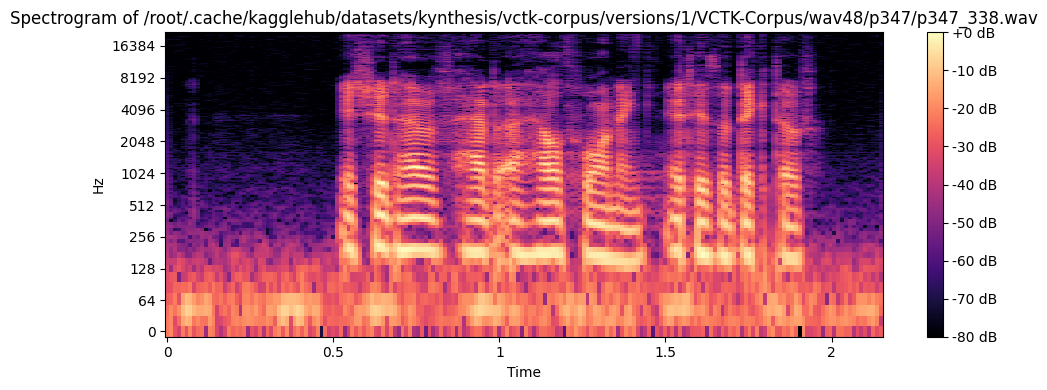

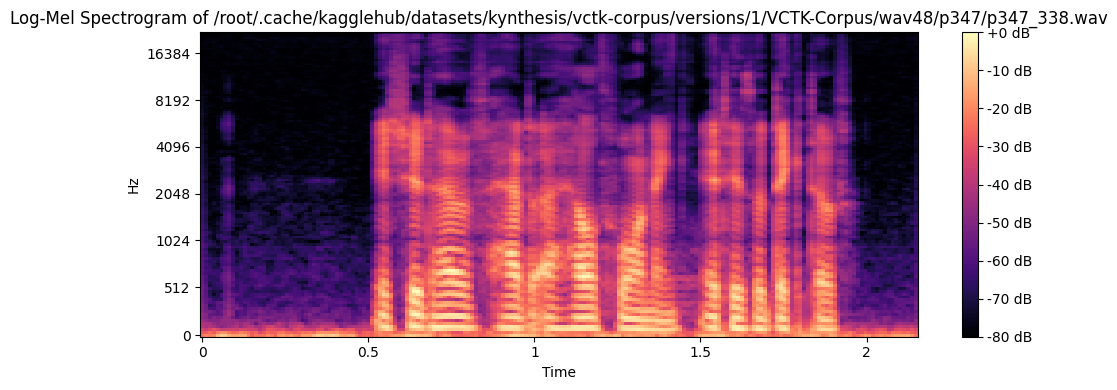

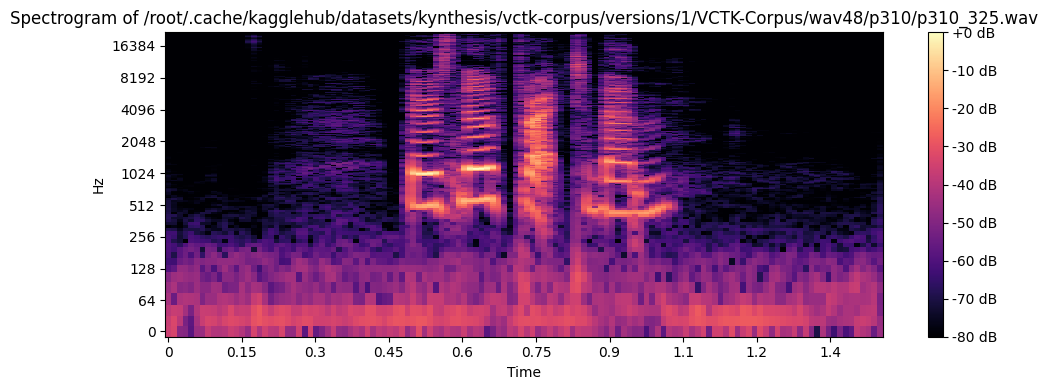

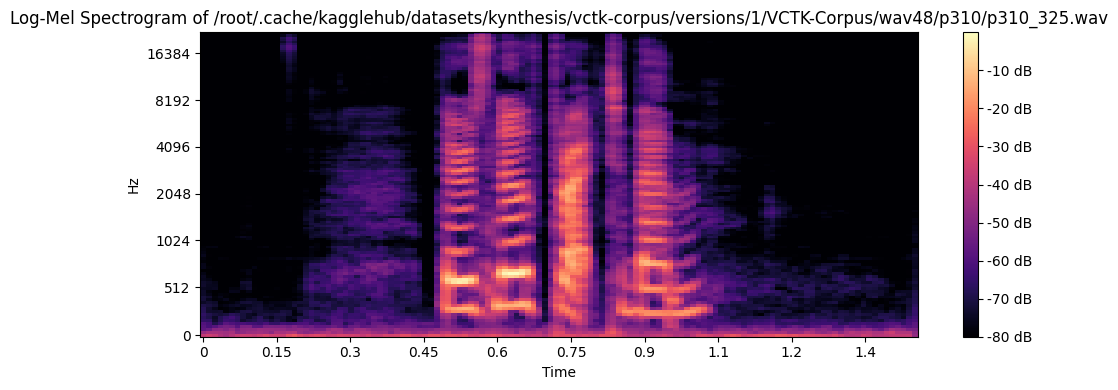

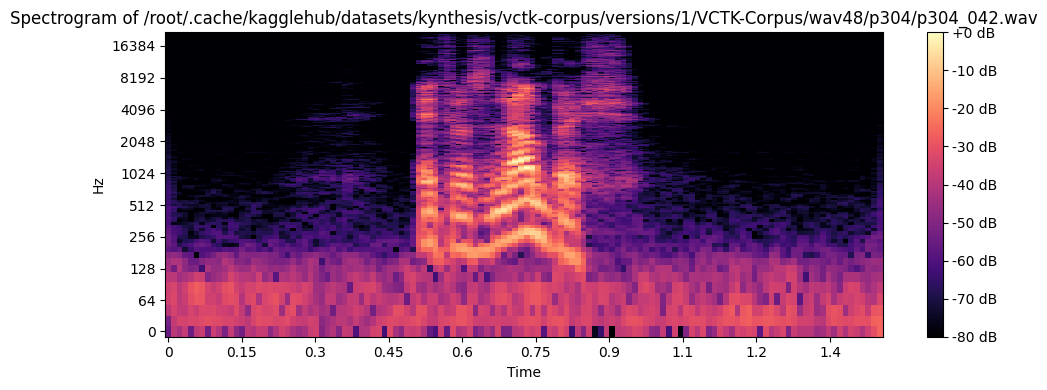

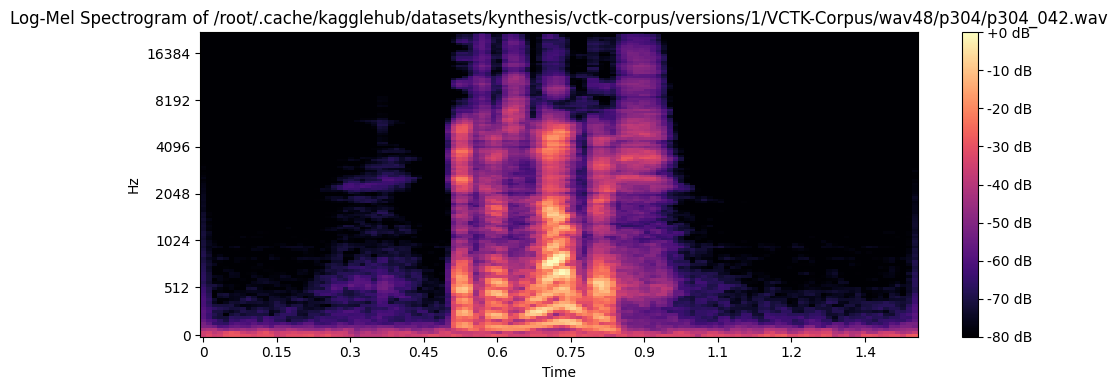

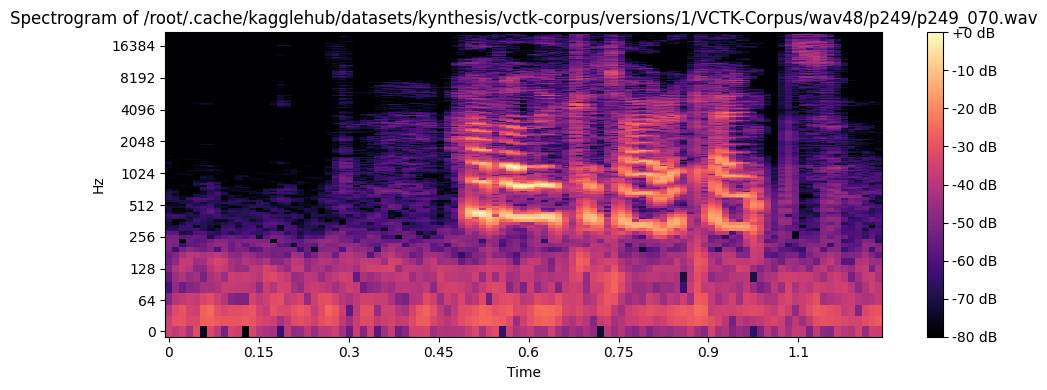

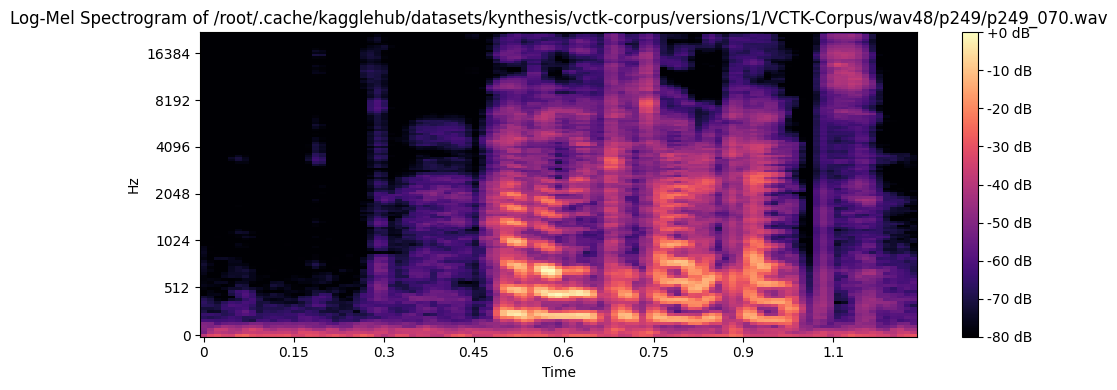

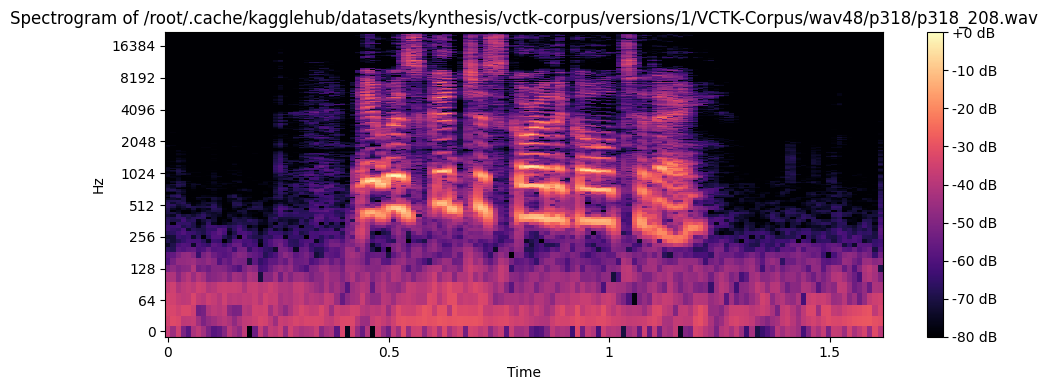

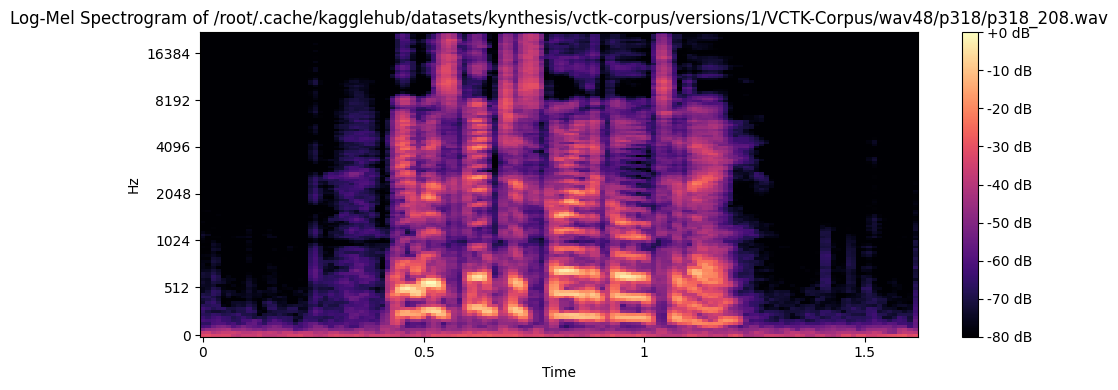

In [ ]:
import random
# Select 5 random files to display
num_samples = 5
random_files = random.sample(list(spectrograms.keys()), num_samples)

print("Selected files:")
for file in random_files:
    print(file)

# Display spectrograms for the selected files
for file in random_files:
    try:
        # Get the spectrograms
        spectrogram = spectrograms[file]["spectrogram"]
        log_mel_spectrogram = spectrograms[file]["log_mel_spectrogram"]

        # Display spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Spectrogram of {file}")
        plt.tight_layout()
        plt.show()

        # Display log-mel spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Log-Mel Spectrogram of {file}")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error displaying {file}: {e}")


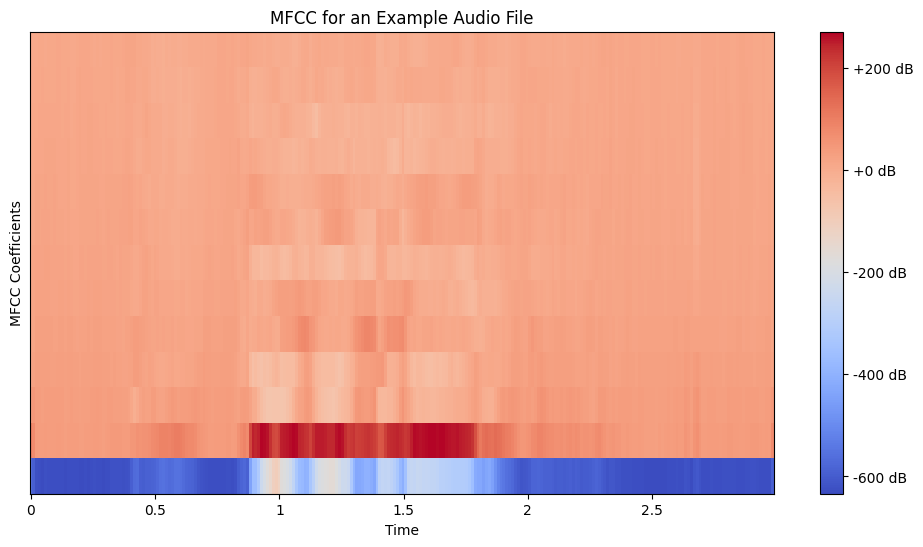

In [ ]:
# Choose an example audio
example_audio = processed_audio[1]
example_sr = sampling_rates[1]
example_mfcc = librosa.feature.mfcc(y=example_audio, sr=example_sr, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(12, 6))
librosa.display.specshow(example_mfcc, x_axis='time', sr=example_sr, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC for an Example Audio File')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()


In [ ]:
# Load the pre-trained feature extractor and model
extractor = AutoFeatureExtractor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
model = AutoModelForAudioClassification.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Padding MFCCs
max_length = max(mfcc.shape[2] for mfcc in mfcc_features)  # Get max length along the time dimension (axis 2)
padded_mfcc_features = []
for mfcc in mfcc_features:
    pad_width = max_length - mfcc.shape[2]  # Calculate pad width for time dimension
    # Pad along the time dimension (axis 2)
    padded_mfcc = np.pad(mfcc, pad_width=((0, 0), (0, 0), (0, pad_width)), mode='constant')  # Pad along time dimension
    padded_mfcc_features.append(padded_mfcc)

features = np.array(padded_mfcc_features)
speakers = [os.path.basename(os.path.dirname(file)) for file in wav_files]
labels = np.array([hash(speaker) % 10 for speaker in speakers])

In [ ]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape features for CNN input (e.g., 2D input for MFCCs)
X_train = X_train[..., np.newaxis]  # Add channel dimension
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Define data augmentation
augmentations = Compose([
    AddGaussianNoise(),
    TimeStretch(),
    PitchShift(),
])

# Preprocess the dataset with augmentations
def preprocess_audio(batch):
    augmented_audio = augmentations(samples=batch, sample_rate=16000)
    return augmented_audio

# Convert to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).map(lambda x, y: (preprocess_audio(x), y)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', save_best_only=True, monitor='val_loss', mode='min'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
]

In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset,
    callbacks=callbacks
)



In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.4f}")